In [2]:
import pandas as pd

# prevent false warning
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

import geopandas
#from geopandas import GeoSeries
#import contextily as cx

from shapely.geometry import Polygon
from shapely import wkt

In [3]:
gdf = geopandas.read_file('./input/shapes/Districts_Shapefiles_2019/Districts and TC as 2020 FIXED.shp')

In [4]:
len(gdf)

195

<AxesSubplot:>

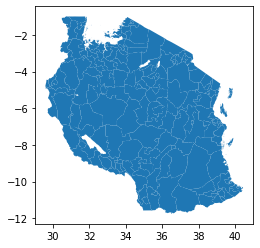

In [5]:
gdf.plot()

In [6]:
gdf['valid'] = gdf['geometry'].is_valid

In [7]:
len(gdf[gdf['valid'] == False])

0

In [8]:
len(gdf['NewDist20'].unique()) # unique name list equals feature count => names are unique!

195

In [6]:
gdf.head()

,Region_Nam,Region_Cod,District_C,NewDist20,geometry
0,Arusha,2,6,Arusha DC,"MULTIPOLYGON (((36.79314 -3.39499, 36.79285 -3..."
1,Arusha,2,3,Arusha MC,"POLYGON ((36.63328 -3.36609, 36.63297 -3.36625..."
2,Arusha,2,4,Karatu DC,"POLYGON ((35.88714 -3.26276, 35.88595 -3.26604..."
3,Arusha,2,7,Longido DC,"MULTIPOLYGON (((36.35809 -3.05992, 36.35823 -3..."
4,Arusha,2,2,Meru DC,"POLYGON ((36.90033 -3.05354, 36.90150 -3.05390..."


In [11]:
from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon

gdf["geometry"] = [MultiPolygon([feature]) if isinstance(feature, Polygon) \
    else feature for feature in gdf["geometry"]]


In [12]:
gdf.rename(columns={
    "NewDist20": "name", 
    "Region_Nam": "region_name", 
    "Region_Cod": "region_id", 
    "District_C": "district_c"
})

,region_name,region_id,district_c,name,geometry
0,Arusha,2,6,Arusha DC,"MULTIPOLYGON (((36.79314 -3.39499, 36.79285 -3..."
1,Arusha,2,3,Arusha MC,"MULTIPOLYGON (((36.63328 -3.36609, 36.63297 -3..."
2,Arusha,2,4,Karatu DC,"MULTIPOLYGON (((35.88714 -3.26276, 35.88595 -3..."
3,Arusha,2,7,Longido DC,"MULTIPOLYGON (((36.35809 -3.05992, 36.35823 -3..."
4,Arusha,2,2,Meru DC,"MULTIPOLYGON (((36.90033 -3.05354, 36.90150 -3..."
...,...,...,...,...,...
190,Songwe,26,5,Songwe DC,"MULTIPOLYGON (((32.89625 -6.93692, 32.89573 -6..."
191,Mara,20,9,Tarime TC,"MULTIPOLYGON (((34.38746 -1.28793, 34.39209 -1..."
192,Dar-es-salaam,7,4,Ubungo MC,"MULTIPOLYGON (((39.16298 -6.69287, 39.16315 -6..."
193,Mara,20,7,Butiama DC,"MULTIPOLYGON (((34.29664 -1.46716, 34.29644 -1..."


In [13]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Region_Nam  195 non-null    object  
 1   Region_Cod  195 non-null    int64   
 2   District_C  195 non-null    int64   
 3   NewDist20   195 non-null    object  
 4   geometry    195 non-null    geometry
dtypes: geometry(1), int64(2), object(2)
memory usage: 7.7+ KB
